In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
from numpy import log2 as log
from pprint import pprint
import seaborn as sns

In [ ]:
from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('diabetes.csv')


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,6,3,low,1,3,3,1
1,0,1,2,low,0,1,2,0
2,3,7,2,low,0,3,2,1
3,0,1,2,high,0,0,1,0
4,0,6,1,high,1,3,2,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Outcome
count,768.000000
mean,0.348958
std,0.476951
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/768)*100})
missing_data

,total_missing,perc_missing
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

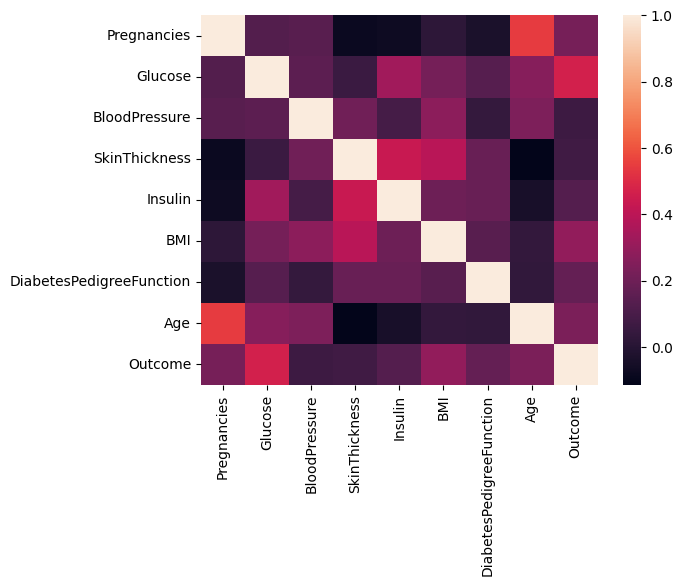

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

df_d0_samp = df_d0.sample(268,replace = False)
df_bal = pd.concat([df_d1, df_d0_samp])

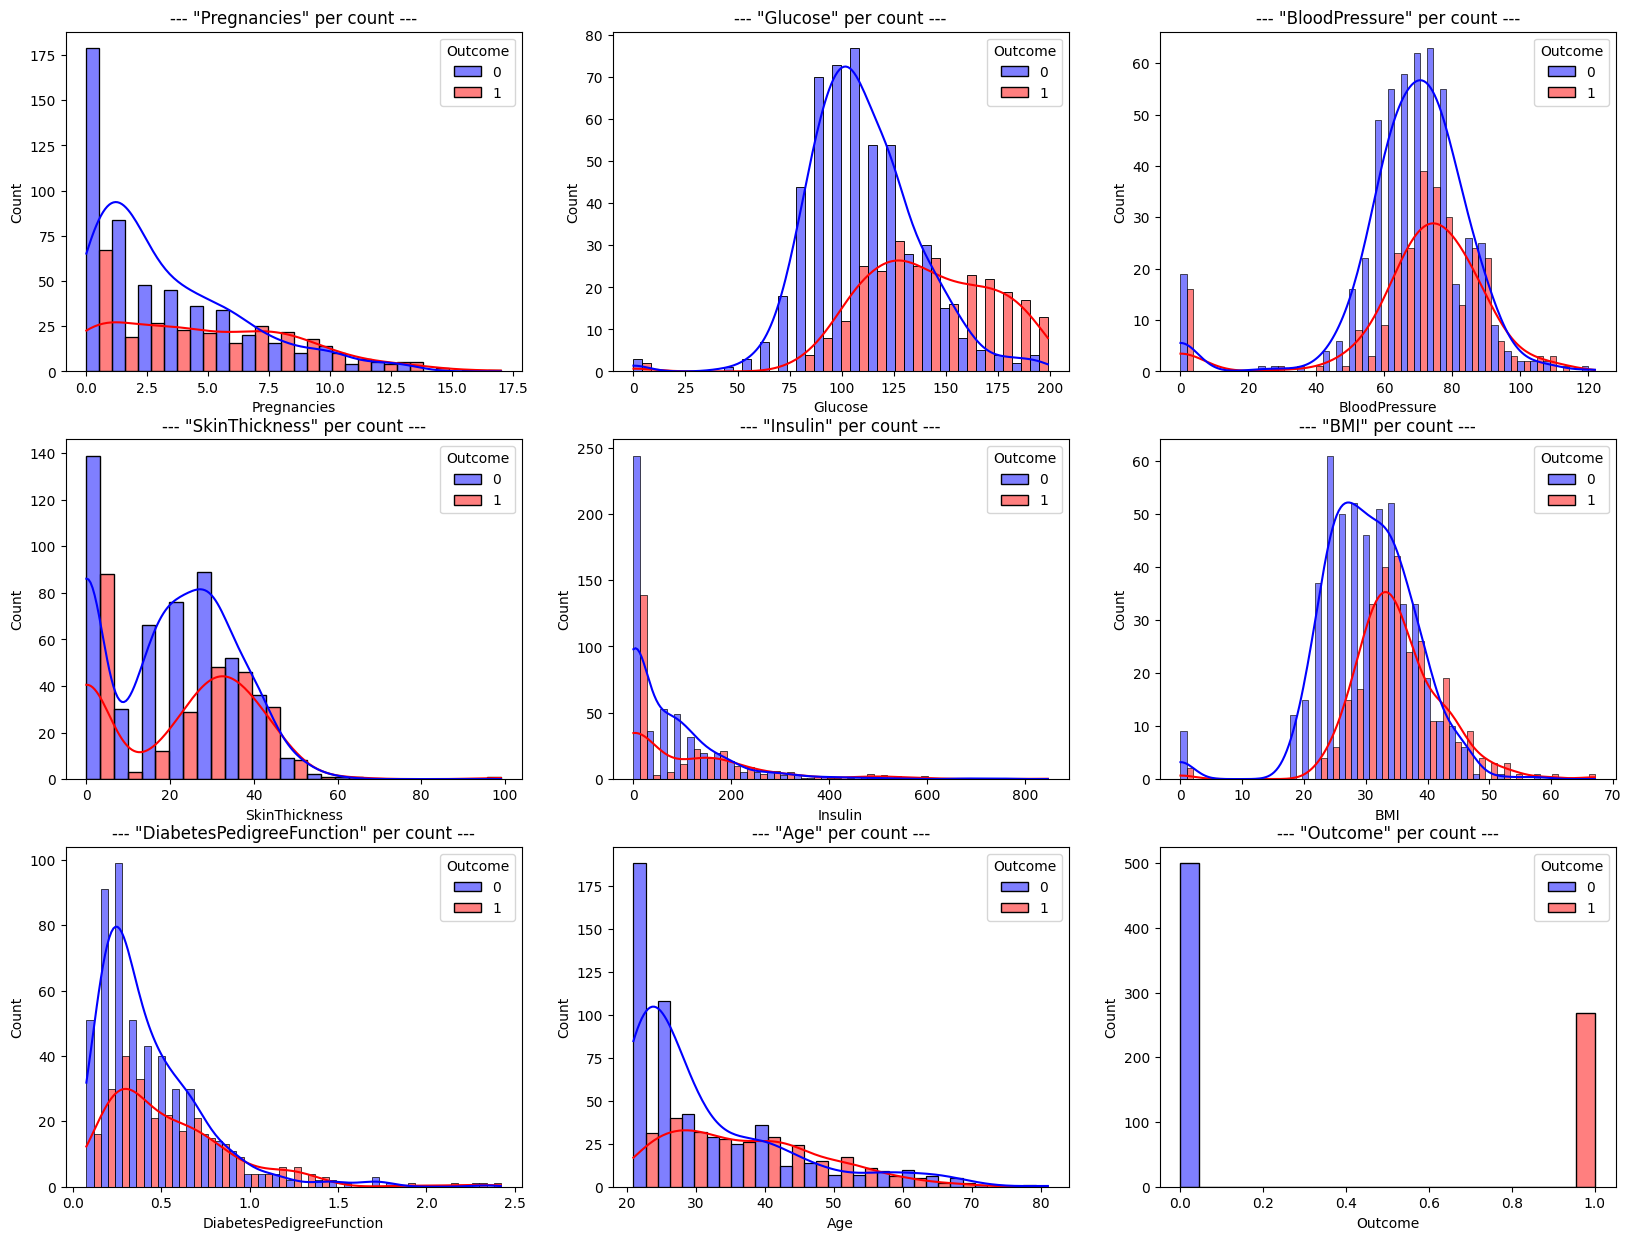

In [ ]:
def look_at_distr_hist(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette={0: 'blue', 1: 'red'}, kde=True)
            plt.title(f'--- "{i}" per count ---')
        plt.plot()
look_at_distr_hist(df_num=df_bal, class_feature="Outcome")

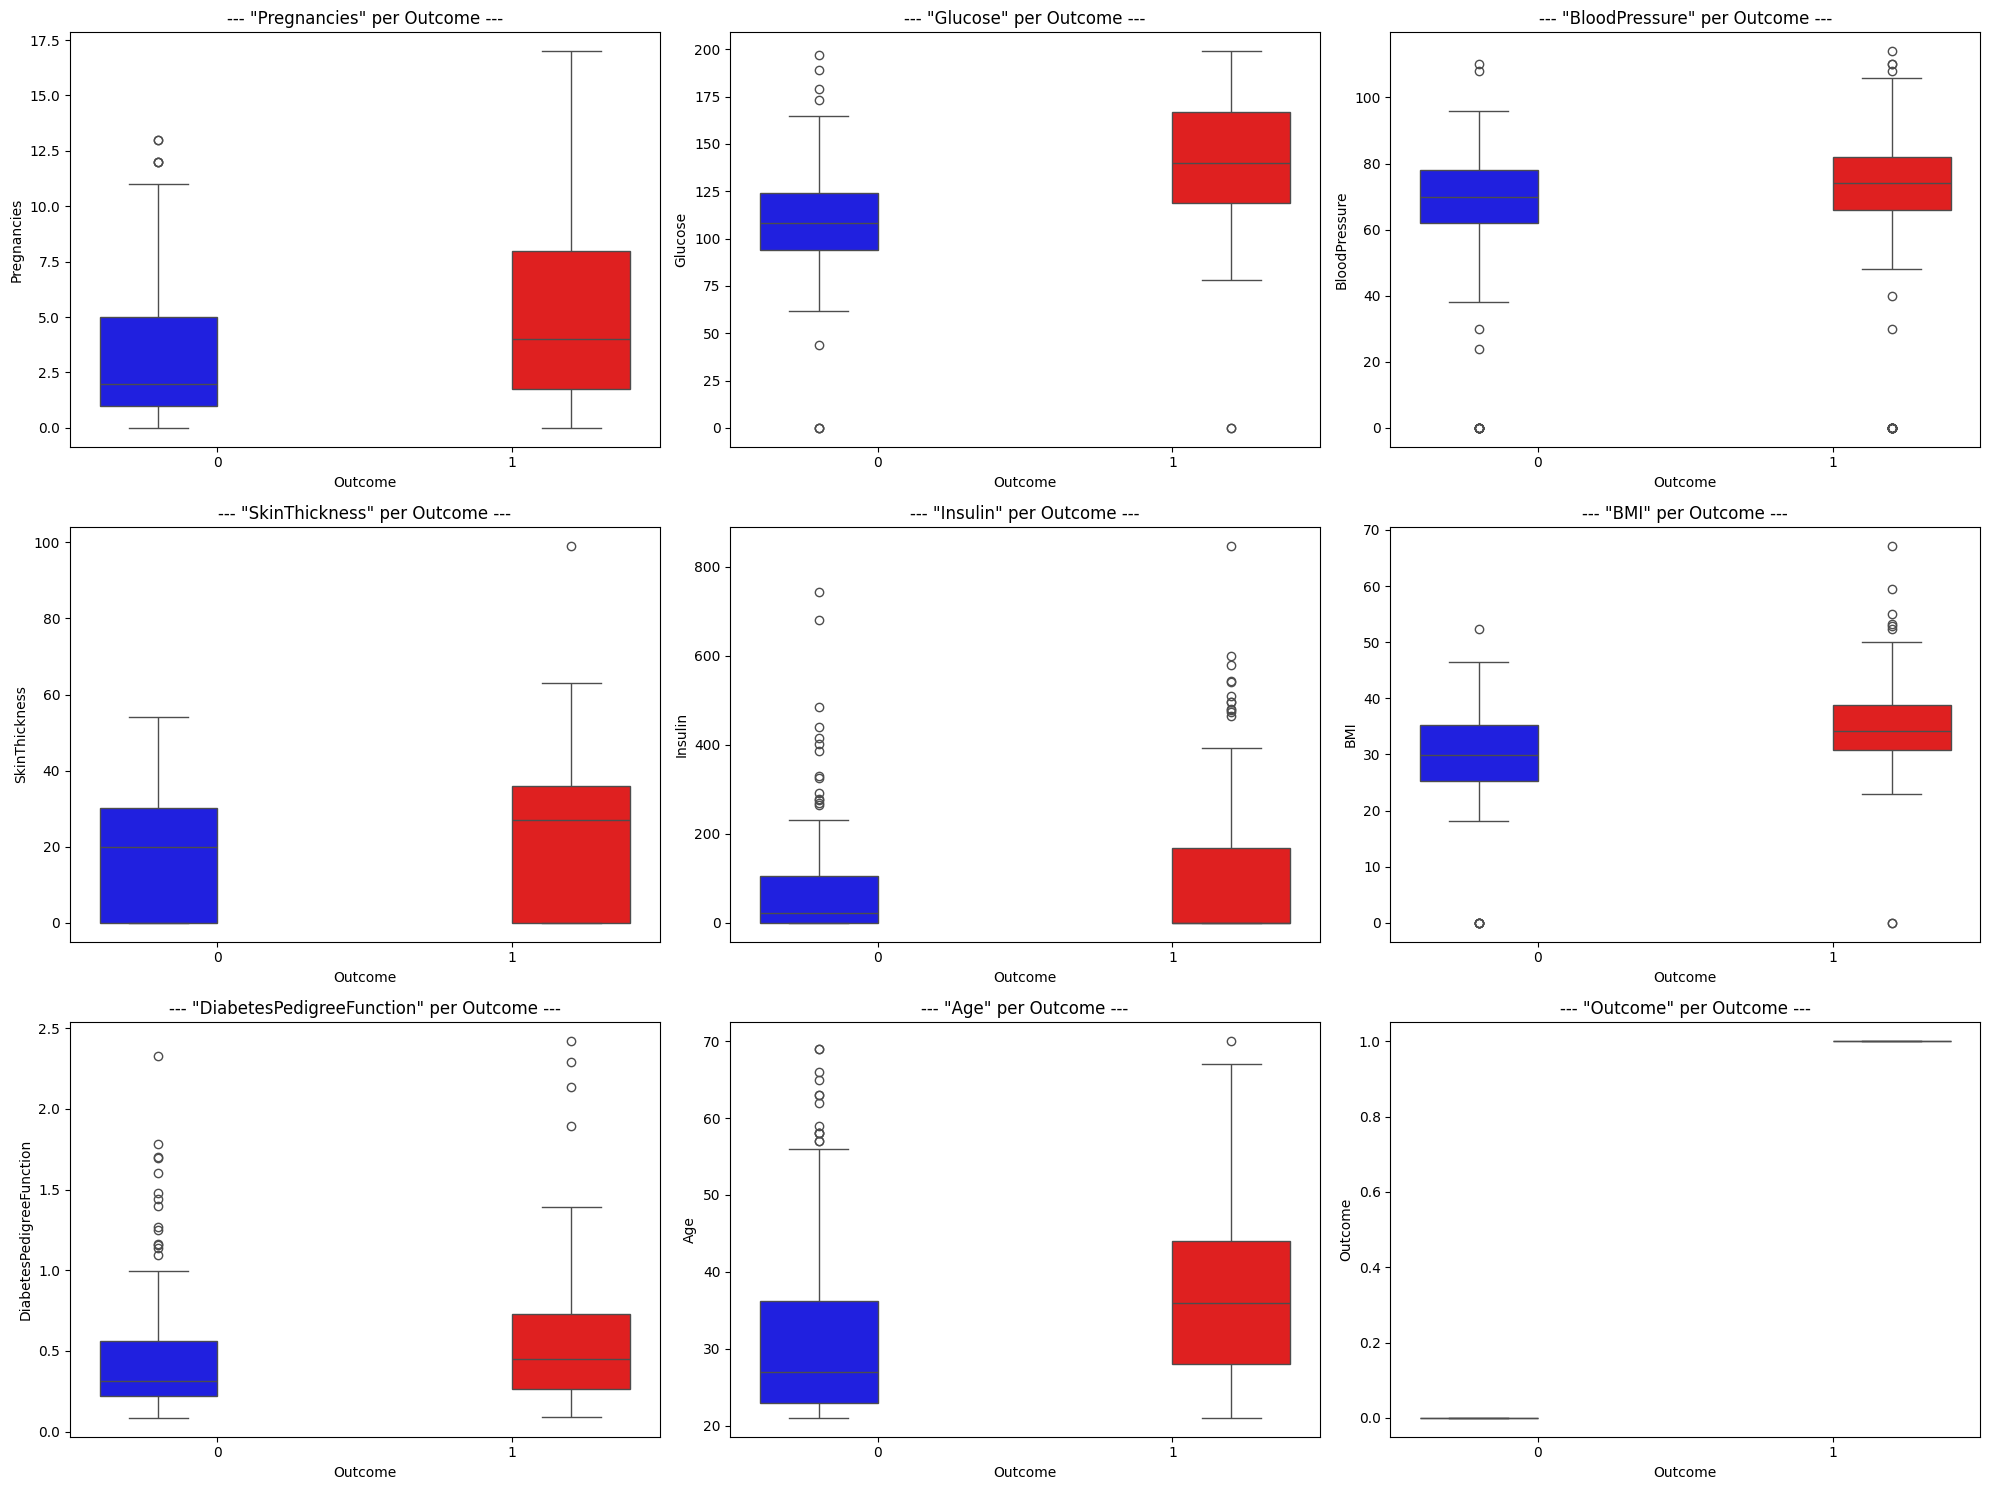

In [ ]:
def look_at_distr_box(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize=[20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.boxplot(data=df_num, y=df_num[str(i)], x=df_num[class_feature], hue=df_num[class_feature], dodge=True, palette={0: 'blue', 1: 'red'}, legend=False)
            plt.title(f'--- "{i}" per {class_feature} ---')
        plt.tight_layout()
        plt.show()

# Gọi hàm
look_at_distr_box(df_num=df_bal, class_feature="Outcome")


In [ ]:
df.drop(columns=[ 'SkinThickness'], inplace=True)

In [ ]:
del df

In [ ]:

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
# df_bal['Glucose'] = df_bal['Glucose'].replace(0, df_bal['Glucose'].median())

In [ ]:
def change_cate(df, ran, categories):
    df = pd.qcut(df, ran, labels=categories, duplicates='drop')
    return df

df['BloodPressure'] = change_cate(df['BloodPressure'], 5, ['1','2','3','4','5'])
df['Glucose'] = change_cate(df['Glucose'], 7, ['1','2','3','4','5','6','7'])
df['Pregnancies'] = change_cate(df['Pregnancies'], 4, ['0','1','2','3'])
df['Insulin'] = change_cate(df['Insulin'], 2, ['low','high'])
df['BMI'] = change_cate(df['BMI'], 2, ['0','1'])
df['DiabetesPedigreeFunction'] = change_cate(df['DiabetesPedigreeFunction'], 4, ['0','1','2','3'])
df['Age'] = change_cate(df['Age'], 3, [1,2,3])


In [ ]:
df.to_excel('processed_data.xlsx', index=False)

files.download('processed_data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def ent(df,attribute):
    target_variables = df.Outcome.unique()
    variables = df[attribute].unique()


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.Outcome==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature

    return(abs(entropy_attribute))

In [ ]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'Pregnancies': 0.8906174365362114,
 'Glucose': 0.7453009684244428,
 'BloodPressure': 0.9145453687635421,
 'Insulin': 0.9239013303582602,
 'BMI': 0.8875090613833397,
 'DiabetesPedigreeFunction': 0.9111364000967174,
 'Age': 0.8682334538933789}

In [ ]:
class Make_tree(object):
    def __init__(self):
        pass

    def buildTree(self, df, attribute_list=None, tree=None):
        Class = df.keys()[-1]

        if len(np.unique(df[Class])) == 1:
            return np.unique(df[Class])[0]

        if attribute_list is None:
            attribute_list = list(df.columns[:-1])
        if len(attribute_list) == 0:
            return df[Class].mode()[0]

        node = self.find_winner(df, attribute_list)
        attValues = np.unique(df[node])

        if tree is None:
            tree = {}
            tree[node] = {}

        attribute_list = [attr for attr in attribute_list if attr != node]

        for value in attValues:
            subtable = self.get_subtable(df, node, value)
            if subtable.empty:
                tree[node][value] = df[Class].mode()[0]
            else:
                tree[node][value] = self.buildTree(subtable, attribute_list)

        return tree

    def find_entropy(self, df):
        Class = df.keys()[-1]
        entropy = 0
        values = df[Class].unique()
        for value in values:
            fraction = df[Class].value_counts()[value] / len(df[Class])
            entropy += -fraction * np.log2(fraction)
        return entropy

    def find_entropy_attribute(self, df, attribute):
        Class = df.keys()[-1]
        target_variables = df[Class].unique()
        variables = df[attribute].unique()
        entropy2 = 0
        for variable in variables:
            entropy = 0
            for target_variable in target_variables:
                num = len(df[attribute][df[attribute] == variable][df[Class] == target_variable])
                den = len(df[attribute][df[attribute] == variable])
                fraction = num / (den + 1e-9)  # Số epsilon nhỏ để tránh chia cho 0
                entropy += -fraction * np.log2(fraction + 1e-9)
            fraction2 = den / len(df)
            entropy2 += fraction2 * entropy
        return abs(entropy2)

    def find_winner(self, df, attribute_list):
        Entropy_att = []
        IG = []
        total_entropy = self.find_entropy(df)
        for attribute in attribute_list:
            IG.append(total_entropy - self.find_entropy_attribute(df, attribute))
        return attribute_list[np.argmax(IG)]

    def get_subtable(self, df, node, value):
        return df[df[node] == value].reset_index(drop=True)


class DecisionTreeID3(object):
    def __init__(self):
        self.tree = None

    def fit(self, df):
        maketree = Make_tree()
        self.tree = maketree.buildTree(df.astype('object'))

    def predict(self, df):
        return np.array([self.pred(self.tree, i) for _, i in df.iterrows()])

    def pred(self, tree, sample):
        if not isinstance(tree, dict):
            return tree
        else:
            root_node = next(iter(tree))
            feature_value = sample[root_node]
            if feature_value in tree[root_node]:
                return self.pred(tree[root_node][feature_value], sample)
            else:
                # Nếu giá trị không có trong cây, dùng nhánh đầu tiên như là dự phòng
                feature_value = list(tree[root_node].keys())[0]
                return self.pred(tree[root_node][feature_value], sample)


In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.2, random_state=42)

In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(1000)

1000


In [ ]:
t = DecisionTreeID3()
t.fit(train_df)
pprint(t.tree)


{'Glucose': {'1': {'Age': {1: 0,
                           2: {'Pregnancies': {'0': {'BloodPressure': {'1': 1,
                                                                       '2': 0,
                                                                       '3': 0}},
                                               '1': {'DiabetesPedigreeFunction': {'1': 1,
                                                                                  '2': 1,
                                                                                  '3': 0}},
                                               '2': 0,
                                               '3': 0}},
                           3: {'BloodPressure': {'1': 0,
                                                 '2': 0,
                                                 '3': {'BMI': {'0': {'DiabetesPedigreeFunction': {'1': 1,
                                                                                                  '2': 0}},
                

In [ ]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame

# Convert 'Pregnancies' column to numeric, handling errors
df['Pregnancies'] = pd.to_numeric(df['Pregnancies'], errors='coerce')
df['Insulin'] = pd.to_numeric(df['Insulin'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['DiabetesPedigreeFunction'] = pd.to_numeric(df['DiabetesPedigreeFunction'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['BloodPressure'] = pd.to_numeric(df['BloodPressure'], errors='coerce')

def calculate_quartiles(data):
    # Sắp xếp dãy số
    data = sorted(data)

    # Tính các tứ phân vị
    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)

    return Q1, Q2, Q3

def calculate_three(data):
    # Sắp xếp dãy số
    data = sorted(data)

    # Tính các tứ phân vị
    Q1 = np.percentile(data, 33)
    Q2 = np.percentile(data, 67)
    #Q3 = np.percentile(data, 75)

    return Q1, Q2
def calculate_two(data):
    # Sắp xếp dãy số
    data = sorted(data)

    # Tính các tứ phân vị
    #Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    #Q3 = np.percentile(data, 75)

    return Q2
def calculate_five(data):
    # Sắp xếp dãy số
    data = sorted(data)

    # Tính các tứ phân vị
    Q1 = np.percentile(data, 20)
    Q2 = np.percentile(data, 40)
    Q3 = np.percentile(data, 60)
    Q4 = np.percentile(data, 80)

    return Q1, Q2, Q3, Q4



In [ ]:
def pregnancy(data, values):
    if data <= values[0]:
      data = 0
    elif values[0] < data <= values[1]:
      data = 1
    elif (values[1] < data <= values[2]):
      data = 2
    else:
      data = 3
    return data
def insulin(data, values):
    strdata = ''
    if data <= values:
      strdata = 'low'
    else:
      strdata = 'high'
    return strdata
def bmi(data, values):
    if data < values:
      data = 0
    else:
      data = 1
    return data
def diabetes_pedigree_function(data, values):
    if data < values[0]:
      data = 0
    elif values[0] < data <= values[1]:
      data = 1
    elif (values[1] < data <= values[2]):
      data = 2
    else:
      data = 3
    return data
def age(data, values):
    if data < values[0]:
      data = 1
    elif values[0] < data <= values[1]:
      data = 2
    else:
      data = 3
    return data
def blood_pressure(data, values):
    if data < values[0]:
      data = 1
    elif values[0] < data <= values[1]:
      data = 2
    elif values[1] < data <= values[2]:
      data = 3
    elif values[2] < data <= values[3]:
      data = 4
    else:
      data = 5
    return data

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

# Hàm nhập dữ liệu từ người dùng và chuyển đổi các giá trị thành phân loại
def get_user_input():
    pregnancies = int(input("Nhập số lần mang thai: "))
    blood = float(input("Nhập huyết áp: "))
    glucose = int(input("Nhập nồng độ Glucose: "))
    insulin_input = int(input("Nhập nồng độ Insulin: ")) # Changed variable name to insulin_input
    bmi_input = float(input("Nhập chỉ số BMI: ")) # Changed variable name to bmi_input
    diabetes_pedigree_function_input = float(input("Nhập chỉ số Diabetic Pedigree Function: ")) # Changed variable name to diabetes_pedigree_function_input
    age_input = int(input("Nhập độ tuổi: ")) # Changed variable name to age_input

    pregnan = pregnancy(pregnancies, calculate_quartiles(df['Pregnancies']))
    blood_press = blood_pressure(blood, calculate_five(df['BloodPressure']))
    strinsulin = insulin(insulin_input, calculate_two(df['Insulin'])) # Use insulin_input here
    bmi_result = bmi(bmi_input, calculate_two(df['BMI'])) # Use bmi_input and store result in bmi_result
    diabetes_pedigree_function_result = diabetes_pedigree_function(diabetes_pedigree_function_input, calculate_quartiles(df['DiabetesPedigreeFunction'])) # Use diabetes_pedigree_function_input and store in diabetes_pedigree_function_result
    age_result = age(age_input, calculate_three(df['Age'])) # Use age_input and store in age_result
    # Tạo một từ điển với các giá trị đã phân loại
    return {
        'Pregnancies': str(pregnan),
        'BloodPressure': str(blood_press),
        'Glucose': str(glucose),  # Glucose có thể đã được phân loại thành các nhóm số từ 1 đến 7
        'Insulin': strinsulin,
        'BMI': bmi_result, # Use bmi_result here
        'DiabetesPedigreeFunction': diabetes_pedigree_function_result, # Use diabetes_pedigree_function_result here
        'Age': age_result # Use age_result here
    }

# Dự đoán bệnh tiểu đường dựa trên dữ liệu nhập
def predict_diabetes():
    # Nhập dữ liệu người dùng
    user_data = get_user_input()

    # Chuyển đổi dữ liệu người dùng thành DataFrame
    user_df = pd.DataFrame([user_data])

    # Dự đoán kết quả
    prediction = t.predict(user_df)

    # In ra kết quả dự đoán
    if prediction[0] == 1:
        print("Người này có khả năng mắc bệnh tiểu đường.")
    else:
        print("Người này không mắc bệnh tiểu đường.")

# Gọi hàm dự đoán để nhập dữ liệu và in ra kết quả
predict_diabetes()


Nhập số lần mang thai: 3
Nhập huyết áp: 72
Nhập nồng độ Glucose: 54
Nhập nồng độ Insulin: 94
Nhập chỉ số BMI: 33.6
Nhập chỉ số Diabetic Pedigree Function: 0.627
Nhập độ tuổi: 25
Người này không mắc bệnh tiểu đường.


In [ ]:
from graphviz import Digraph

def visualize_tree(tree, dot=None, parent_name=None, label=""):
    """
    Vẽ cây quyết định sử dụng graphviz từ cây biểu diễn dưới dạng dictionary.
    """
    if dot is None:
        dot = Digraph(format='pdf')
        dot.attr('node', shape='ellipse', fontsize='10', fontname='Arial')

    # Nếu nút hiện tại là một lớp kết quả cuối cùng (nút lá)
    if not isinstance(tree, dict):
        node_name = f"leaf_{parent_name}_{label}"
        dot.node(node_name, label=str(tree))
        if parent_name:
            dot.edge(parent_name, node_name, label=label)
        return dot

    # Nút hiện tại là một thuộc tính phân chia
    root = next(iter(tree))
    node_name = f"{root}_{id(tree)}"
    dot.node(node_name, label=str(root))

    # Nếu có nút cha, tạo cạnh nối giữa cha và nút hiện tại
    if parent_name:
        dot.edge(parent_name, node_name, label=label)

    # Duyệt qua các giá trị của thuộc tính và xây dựng cây con
    for branch_label, subtree in tree[root].items():
        visualize_tree(subtree, dot, parent_name=node_name, label=str(branch_label))

    return dot

# Sử dụng hàm để vẽ cây quyết định
tree = t.tree

# Vẽ cây quyết định
dot = visualize_tree(tree)
dot.render("decision_tree", view=True)


'decision_tree.pdf'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Bước 1: Sử dụng mô hình để dự đoán nhãn trên tập kiểm tra
predictions = t.predict(test_df.drop(columns=[df.keys()[-1]]))

# Bước 2: Tính độ chính xác
accuracy = accuracy_score(test_df[df.keys()[-1]], predictions)
print(f'Accuracy: {accuracy:.2f}')

# Bước 3: Tính Precision, Recall, và F1-Score
precision = precision_score(test_df[df.keys()[-1]], predictions, average='weighted')
recall = recall_score(test_df[df.keys()[-1]], predictions, average='weighted')
f1 = f1_score(test_df[df.keys()[-1]], predictions, average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



Accuracy: 0.64
Precision: 0.64
Recall: 0.64
F1 Score: 0.64
